In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10260771832681275354, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15295243918196118635
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1145807697571115329
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10483951207
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13861109374451592461
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1"]

In [3]:
image_folder_path = '/media/disk2/vefimova/icdar/ch2_training_images/'
gt_path = '/media/disk2/vefimova/icdar/ch2_training_localization_transcription_gt/'

In [4]:
processed_image_folder_path = '/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina/'
processed_image_arial_path = '/media/disk2/vefimova/icdar/ch2_processed_training_images_arial/'
image_folder_path_small = image_folder_path[:-1] + "_small/"
processed_image_folder_path_small = processed_image_folder_path[:-1] + "_small/"
processed_image_arial_path_small = processed_image_arial_path[:-1] + "_small/"
print(image_folder_path_small)
print(processed_image_folder_path_small)

/media/disk2/vefimova/icdar/ch2_training_images_small/
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/


In [7]:
# os.mkdir(image_folder_path_small)
# os.mkdir(processed_image_folder_path_small)
# os.mkdir(processed_image_arial_path_small)

In [5]:
from PIL import Image
from scipy.misc import imresize, imsave
import cv2
import numpy as np

In [8]:
for (i, path) in enumerate(os.listdir(image_folder_path)):
    # read real
    image = Image.open(image_folder_path + path)
    image = imresize(image, (256, 256))
    # read mask 
    mask = cv2.imread(processed_image_arial_path + path)
    mask = imresize(mask, (256, 256))
    # add
    imgs_comb = np.hstack(np.asarray([image, mask]))
    new_image = Image.fromarray(imgs_comb)  
    new_image.save(processed_image_arial_path_small + path)
    
    #imsave(image_folder_path_small + path, new_image)
    print(processed_image_arial_path_small + path + "    " + str(i))

/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_80.jpg    0
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_154.jpg    1
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_84.jpg    2
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_134.jpg    3
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_26.jpg    4
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_17.jpg    5
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_32.jpg    6
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_220.jpg    7
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_87.jpg    8
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_79.jpg    9
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_199.jpg    10
/media/disk2/vefimova/icdar/ch2_processed_trainin

/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_127.jpg    98
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_92.jpg    99
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_15.jpg    100
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_63.jpg    101
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_224.jpg    102
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_210.jpg    103
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_9.jpg    104
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_194.jpg    105
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_108.jpg    106
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_55.jpg    107
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_171.jpg    108
/media/disk2/vefimova/icdar/c

/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_180.jpg    191
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_211.jpg    192
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_49.jpg    193
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_25.jpg    194
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_173.jpg    195
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_160.jpg    196
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_229.jpg    197
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_16.jpg    198
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_46.jpg    199
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_70.jpg    200
/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_56.jpg    201
/media/disk2/vefimova/icdar

In [58]:
for (i, path) in enumerate(os.listdir(image_folder_path)):
    # read real
    image = Image.open(image_folder_path + path)
    image = imresize(image, (256, 256))
    # read mask 
    mask = cv2.imread(processed_image_folder_path + path)
    mask = imresize(mask, (256, 256))
    # add
    imgs_comb = np.hstack(np.asarray([image, mask]))
    new_image = Image.fromarray(imgs_comb)  
    new_image.save(image_folder_path_small + path)
    
    #imsave(image_folder_path_small + path, new_image)
    print(image_folder_path_small + path + "    " + str(i))

/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


/media/disk2/vefimova/icdar/ch2_training_images_small/img_80.jpg    0
/media/disk2/vefimova/icdar/ch2_training_images_small/img_154.jpg    1
/media/disk2/vefimova/icdar/ch2_training_images_small/img_84.jpg    2
/media/disk2/vefimova/icdar/ch2_training_images_small/img_134.jpg    3
/media/disk2/vefimova/icdar/ch2_training_images_small/img_26.jpg    4
/media/disk2/vefimova/icdar/ch2_training_images_small/img_17.jpg    5
/media/disk2/vefimova/icdar/ch2_training_images_small/img_32.jpg    6
/media/disk2/vefimova/icdar/ch2_training_images_small/img_220.jpg    7
/media/disk2/vefimova/icdar/ch2_training_images_small/img_87.jpg    8
/media/disk2/vefimova/icdar/ch2_training_images_small/img_79.jpg    9
/media/disk2/vefimova/icdar/ch2_training_images_small/img_199.jpg    10
/media/disk2/vefimova/icdar/ch2_training_images_small/img_44.jpg    11
/media/disk2/vefimova/icdar/ch2_training_images_small/img_204.jpg    12
/media/disk2/vefimova/icdar/ch2_training_images_small/img_43.jpg    13
/media/disk

/media/disk2/vefimova/icdar/ch2_training_images_small/img_205.jpg    117
/media/disk2/vefimova/icdar/ch2_training_images_small/img_90.jpg    118
/media/disk2/vefimova/icdar/ch2_training_images_small/img_21.jpg    119
/media/disk2/vefimova/icdar/ch2_training_images_small/img_111.jpg    120
/media/disk2/vefimova/icdar/ch2_training_images_small/img_147.jpg    121
/media/disk2/vefimova/icdar/ch2_training_images_small/img_152.jpg    122
/media/disk2/vefimova/icdar/ch2_training_images_small/img_170.jpg    123
/media/disk2/vefimova/icdar/ch2_training_images_small/img_18.jpg    124
/media/disk2/vefimova/icdar/ch2_training_images_small/img_33.jpg    125
/media/disk2/vefimova/icdar/ch2_training_images_small/img_128.jpg    126
/media/disk2/vefimova/icdar/ch2_training_images_small/img_39.jpg    127
/media/disk2/vefimova/icdar/ch2_training_images_small/img_223.jpg    128
/media/disk2/vefimova/icdar/ch2_training_images_small/img_159.jpg    129
/media/disk2/vefimova/icdar/ch2_training_images_small/im

In [9]:
from IPython.display import Image as I

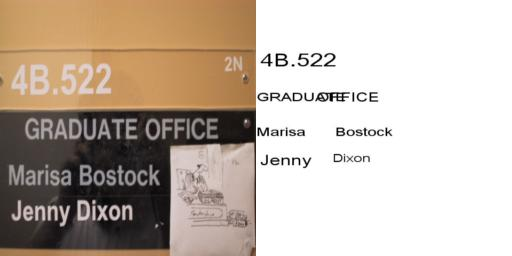

In [10]:
I(filename=("/media/disk2/vefimova/icdar/ch2_processed_training_images_arial_small/img_161.jpg")) 

In [61]:
import matplotlib.pyplot as plt

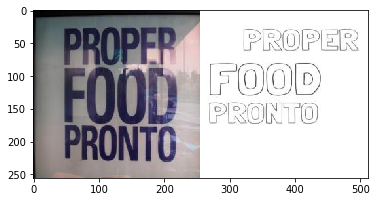

In [62]:
ttt = cv2.imread("/media/disk2/vefimova/icdar/ch2_training_images_small/img_1.jpg")
plt.figure()
plt.imshow(ttt)

In [24]:
for (i, path) in enumerate(os.listdir(processed_image_folder_path)):
    image = cv2.imread(processed_image_folder_path + path)
    image = imresize(image, (256, 256))
    imsave(processed_image_folder_path_small + path, image)
    print(processed_image_folder_path_small + path + "    " + str(i))

/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_80.jpg    0
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_154.jpg    1
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_84.jpg    2
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_134.jpg    3
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_26.jpg    4
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_17.jpg    5
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_32.jpg    6
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_220.jpg    7
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_87.jpg    8
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_79.jpg    9
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_199.jpg    10
/media/disk2/vef

/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_153.jpg    93
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_88.jpg    94
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_174.jpg    95
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_101.jpg    96
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_36.jpg    97
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_127.jpg    98
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_92.jpg    99
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_15.jpg    100
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_63.jpg    101
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_224.jpg    102
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_210.jpg    103


/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_208.jpg    187
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_158.jpg    188
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_201.jpg    189
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_13.jpg    190
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_180.jpg    191
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_211.jpg    192
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_49.jpg    193
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_25.jpg    194
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_173.jpg    195
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_160.jpg    196
/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_229.jp

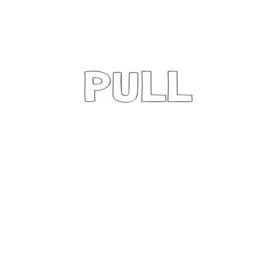

In [25]:
I(filename=("/media/disk2/vefimova/icdar/ch2_processed_training_images_londrina_small/img_220.jpg")) 

In [41]:
def read_from_file(path):
    corners = []
    text = []
    f = open(path, "r", encoding='utf-8')
    for box in f:
        box = box.rstrip()
        all = box.split(',')
        if (all[8] == '###'):
            continue
        text.append(all[8])
        all[0] = all[0][1:]
        corners.append([(int(x) if (x != '') else '') for x in all[:8]])
    f.close()
    return text, corners

In [42]:
from random import randrange
from PIL import Image, ImageDraw, ImageFont
import textwrap
from scipy.misc import imresize, imsave
import numpy as np

In [51]:
def draw_text(img_name, imgdim, text, position, color3):

    data = np.full(imgdim, 255, dtype=np.uint8)
    image = Image.fromarray(data, 'RGB')

    draw = ImageDraw.Draw(image)

    font_path = 'LondrinaOutline-Regular.ttf'

    color = 'rgb(%d, %d, %d)'%(color3[0], color3[1], color3[2])

    for (i, t) in enumerate(text):
        font_size = int(abs(corners[i][1] - corners[i][7]) * 72 / 70)
        #print(font_size)
        font = ImageFont.truetype(font_path, size=font_size)
        if (position[i][0] == ''):
            position[i][0] = 0
        if (i > 0):
            if (abs(position[i][1] - position[i - 1][1]) < 20):
                position[i][0] += 50
        draw.text((position[i][0], position[i][1]), t, fill=color, font=font)

    imsave(img_name, image)

In [52]:
from get_image_size import get_image_size
import math

In [54]:
test_path = "img_1.jpg"
text, corners = read_from_file(gt_path + "gt_" + test_path[:-4] + ".txt")
print(text)
print(corners)
font_size = int(abs(corners[0][0] - corners[0][2]) * 72 / 200)
wide_wrap = abs(corners[0][1] - corners[0][7])
print(font_size)
print(wide_wrap)
sz = get_image_size(image_folder_path + test_path)
img = draw_text(processed_image_folder_path + test_path, (sz[0], sz[1], 3), text, corners, (0, 0, 0))

['PROPER', 'FOOD', 'PRONTO']
[[120, 49, 546, 49, 546, 157, 120, 157], [21, 163, 549, 163, 549, 327, 121, 327], [22, 329, 546, 329, 546, 434, 122, 434]]
153
108


/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [55]:
import matplotlib.pyplot as plt
from IPython.display import Image as I

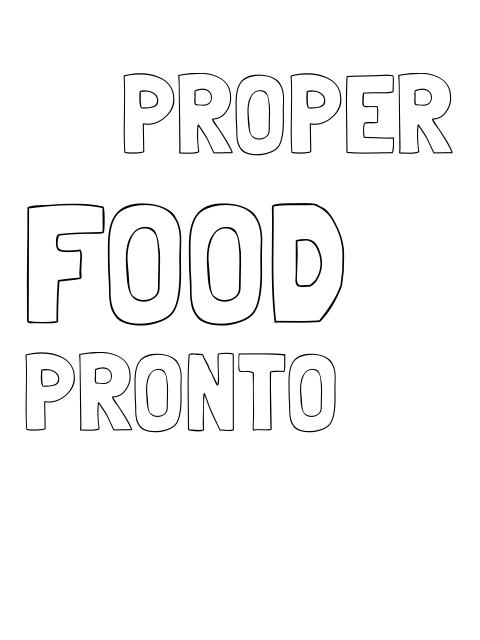

In [56]:
I(filename=(processed_image_folder_path + test_path)) 

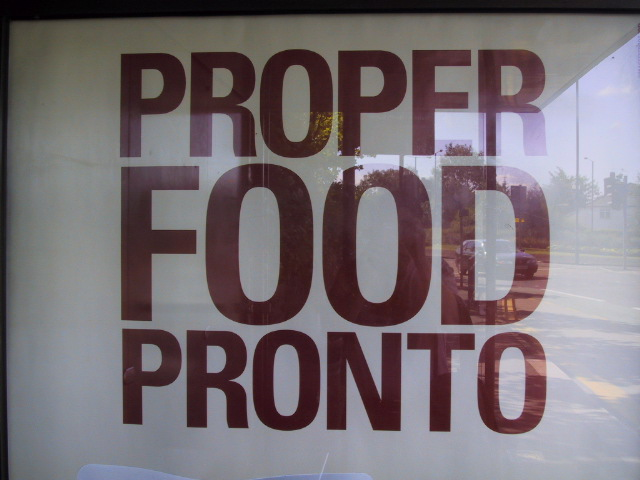

In [18]:
I(filename=(image_folder_path + test_path)) 

In [57]:
for (i, path) in enumerate(os.listdir(image_folder_path)):
    print(path + " " + str(i + 1))
    text, corners = read_from_file(gt_path + "gt_" + path[:-4] + ".txt")
    sz = get_image_size(image_folder_path + path)
    draw_text(processed_image_folder_path + path, (sz[0], sz[1], 3), text, corners, (0, 0, 0))

img_80.jpg 1
img_154.jpg 2
img_84.jpg 3
img_134.jpg 4


/nfs/home/vefimova/diplom/tenv/lib/python3.5/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


img_26.jpg 5
img_17.jpg 6
img_32.jpg 7
img_220.jpg 8
img_87.jpg 9
img_79.jpg 10
img_199.jpg 11
img_44.jpg 12
img_204.jpg 13
img_43.jpg 14
img_207.jpg 15
img_193.jpg 16
img_114.jpg 17
img_59.jpg 18
img_53.jpg 19
img_117.jpg 20
img_123.jpg 21
img_94.jpg 22
img_28.jpg 23
img_188.jpg 24
img_163.jpg 25
img_209.jpg 26
img_106.jpg 27
img_191.jpg 28
img_172.jpg 29
img_167.jpg 30
img_218.jpg 31
img_10.jpg 32
img_164.jpg 33
img_176.jpg 34
img_227.jpg 35
img_122.jpg 36
img_183.jpg 37
img_112.jpg 38
img_47.jpg 39
img_105.jpg 40
img_100.jpg 41
img_195.jpg 42
img_110.jpg 43
img_30.jpg 44
img_71.jpg 45
img_74.jpg 46
img_73.jpg 47
img_64.jpg 48
img_40.jpg 49
img_198.jpg 50
img_8.jpg 51
img_85.jpg 52
img_82.jpg 53
img_184.jpg 54
img_24.jpg 55
img_86.jpg 56
img_27.jpg 57
img_91.jpg 58
img_2.jpg 59
img_109.jpg 60
img_29.jpg 61
img_182.jpg 62
img_35.jpg 63
img_102.jpg 64
img_118.jpg 65
img_146.jpg 66
img_68.jpg 67
img_77.jpg 68
img_135.jpg 69
img_185.jpg 70
img_50.jpg 71
img_213.jpg 72
img_83.jpg 73
img_1